### Radhe Krishna

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import *
import matplotlib.pyplot as plt
import numpy as np

### loading dataset function

In [12]:
def load_dataset():
    (x_train , y_train ), (x_test,y_test)= mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0],28,28,1))
    x_test = x_test.reshape((x_test.shape[0],28,28,1))

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, y_train, x_test, y_test
    

### Example of loading data fom folder 

In [ ]:
import numpy as np 
import cv2
import os

train_path =r"C:\Users\HP\Desktop\Deep Learning\Machine_Learning_Algorithm\Experiment 2\archive\trainingSet\trainingSet"
test_path = r"C:\Users\HP\Desktop\Deep Learning\Machine_Learning_Algorithm\Experiment 2\archive\testSet\testSet"

def load_data(folder):
    image = []
    labels = []

    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                image.append(img)
                labels.append(int(label))
    

    return np.array(image), np.array(labels)


x_train, y_train = load_data(train_path)

print(x_train.shape , y_train.shape)

In [13]:
def show(x_train):
    for i in range(1,10):
        plt.subplot(3,3,i)
        plt.imshow(x_train[i],plt.get_cmap("gray"))

    plt.show()

### function to normalise the pixet value to [0,1]

In [14]:
def  norm_pixel(train,test):
    train_norm = train.astype(np.float32)
    test_norm = test.astype(np.float32)

    train_norm = train/255.0
    test_norm = test/255.0
    return train_norm, test_norm

### creating model

In [29]:
from keras import Sequential
from keras.optimizers import SGD 
from keras.layers import Dense , Conv2D , Flatten , MaxPooling2D
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10 , activation = "softmax"))

    opt= SGD(learning_rate = 0.01 , momentum = 0.9)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


### Evaluting model and compile and fitting the model

In [30]:
from sklearn.model_selection import KFold

def evaluateModel(X_data, Y_data, n_split=5):
    scores, histories = list(), list()
    kfold = KFold(n_splits=n_split, shuffle=True, random_state=1)
    
    # Iterate through the KFold splits
    for train_ind, test_ind in kfold.split(X_data):
        model = define_model()
        trainX, trainY, testX, testY = X_data[train_ind], Y_data[train_ind], X_data[test_ind], Y_data[test_ind]
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    
    return scores, histories


        



### Graph of Cross Entropy Loss and Classification accuracy

In [31]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
 # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

### Boxplot Graph

In [35]:
from numpy import mean, std
def summarize_performance(scores):
 # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
 # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

In [36]:
def run_model():
    trainX,trainY,testX,testY =load_dataset()
    trainX ,testX = norm_pixel(trainX,testX)
    score,histories= evaluateModel(trainX,trainY)
    summarize_diagnostics(histories)
    summarize_performance(score)



> 98.575
> 98.650
> 98.550
> 98.842
> 98.683


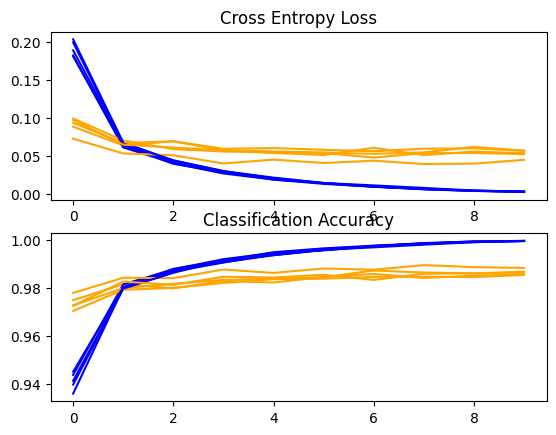

Accuracy: mean=98.660 std=0.103, n=5


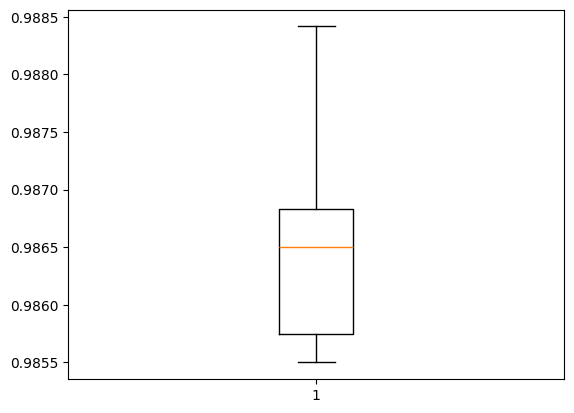

In [38]:
run_model()